# 6.1 Installing libraries

*Estimated time for this notebook: 10 minutes*

We've seen that there are lots of python libraries. But how do we install them?

The main problem is this: *libraries need other libraries*

So you can't just install a library by copying code to the computer: you'll find yourself wandering down a tree
of "dependencies"; libraries needed by libraries needed by the library you want.

This is actually a good thing; it means that people are making use of each others'
code. There's a real problem in scientific programming, of people who think they're really clever writing their own
twenty-fifth version of the same thing.

So using other people's libraries is good.

Why don't we do it more? Because it can often be quite difficult to **install** other peoples' libraries!

Python has developed a good tool for avoiding this: **pip**.

## Installing scikit-learn using pip

On a computer you control, on which you have installed python via Anaconda, you will need to open a **terminal**
to invoke the library-installer program, `pip`.

* On windows, go to start->all programs->Anaconda->Anaconda Command Prompt
* On mac, start *terminal*. 
* On linux, open a bash shell.

Into this shell, type:
    
`pip install scikit-learn`

The computer will install the package automatically from PyPI. 

Now, close the Jupyter notebook if you have it open, and reopen it. Check your new library is installed with:

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

([], [])

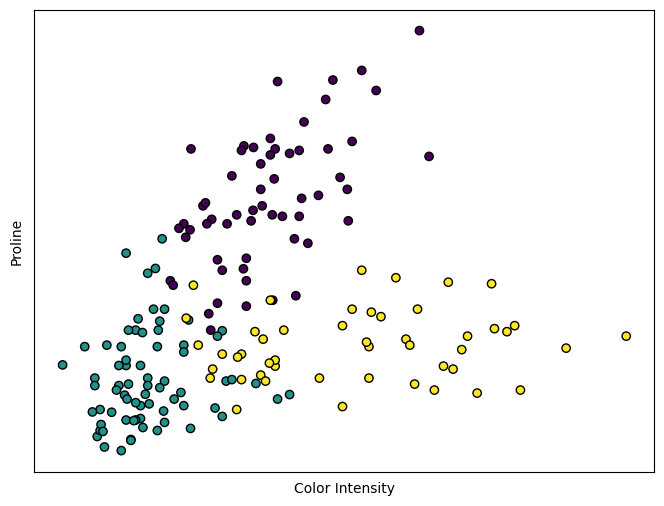

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Find the column index of two features to plot
color_idx = feature_names.index("color_intensity")
proline_idx = feature_names.index("proline")

# Plot the training points
plt.scatter(X[:, color_idx], X[:, proline_idx], c=y, edgecolor="k")
plt.xlabel("Color Intensity")
plt.ylabel("Proline")

plt.xticks(())
plt.yticks(())

That was actually pretty easy, I hope. This is how you'll install new libraries when you need them.

Troubleshooting:
    
On mac or linux, you *might* get a complaint that you need "superuser", "root", or "administrator" access. If so type:

* `pip install --user scikit-learn`

and enter your password.
    
If you get a complaint like: 'pip is not recognized as an internal or external command', try the following:
        
* `conda install pip` (if you are using conda)
* or follow the [official instructions](https://packaging.python.org/en/latest/tutorials/installing-packages/#ensure-you-can-run-pip-from-the-command-line) otherwise

Ask one of the instructors/helpers if you're having difficulties, or open an issue in [the course repo](https://github.com/alan-turing-institute/rse-course/issues).

## Where do these libraries go? 

In [3]:
import numpy

numpy.__path__

['/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/numpy']

Your computer will be configured to keep installed Python packages in a particular place.

Python knows where to look for possible library installations in a list of places, called the "PythonPath".
It will try each of these places in turn, until it finds a matching library name.

In [4]:
import sys

sys.path

['/home/runner/work/rse-course/rse-course/module06_software_projects',
 '/opt/hostedtoolcache/Python/3.8.16/x64/lib/python38.zip',
 '/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8',
 '/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/lib-dynload',
 '',
 '/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages']

## Libraries not on PyPI

Sometimes library code you want to use won't be available on PyPI. In that case there are a few options:

### The library is available on another package index

For example, some libraries not on PyPI are available with `conda` (see details below).

### The library is in a git repo

If the library is available on GitHub or another service hosting git repos, `pip` can install it from the repo instead of PyPI:

```bash
pip install git+https://github.com/alan-turing-institute/sktime.git
```

This could also be an option if you need a development version of a library that hasn't been released yet.

(NB: `sktime` is also available [on PyPI](https://pypi.org/project/sktime/), we just use it as an example here).

### Download and install locally

Sometimes you'll need to download the source code directly, or to test the installation of a library you're working on yourself. To do this, download the code, then,  in a terminal:

```bash
cd <path_to_library_code>  # change to the code directory
pip install .  # install the library at the current path
```


## Installing binary dependencies with conda

`pip` is the usual Python tool for installing libraries. But there's one area of library installation that is still awkward:
some python libraries depend not on other **python** libraries, but on libraries in C++ or Fortran.

This can cause you to run into difficulties installing some libraries. 
Fortunately, Anaconda provide a carefully managed set of scripts for installing lots of these awkward non-python libraries too. You can do this with the `conda` command line tool, if you're using Anaconda.

Simply type

```bash
conda install <whatever>
```

instead of `pip install`. This will fetch the python package not from PyPI, but from Anaconda's distribution for your platform, and manage any non-python dependencies too.

Typically, if you're using Anaconda, whenever you come across a python package you want, you should check if Anaconda package it first using `conda search` (or [this list in the documentation](https://docs.anaconda.com/anaconda/packages/pkg-docs/)). If it is there you can `conda install` it, you'll likely have less problems. But Anaconda doesn't package everything, so you'll need to pip install from time to time.

The maintainers of packages may have also provided releases of their software via [conda-forge](https://conda-forge.org/), a community-driven project that provides a collection of packages for the anaconda environment. In such cases you can [add conda-forge](https://conda-forge.org/#about) to your anaconda installation and use search and install as explained above.

## Other Distribution tools

Distribution tools allow one to obtain a working copy of someone else's package. 

Language-specific tools:

- Python: [PyPI](https://pypi.org/)
- R: [CRAN](https://cran.r-project.org/)
- Ruby: [Ruby Gems](https://rubygems.org/)
- Perl: [CPAN](https://www.cpan.org/)

Platform-specific packagers:

- Ubuntu and Debian: [dpkg](https://www.debian.org/doc/manuals/debian-reference/ch02.en.html) for `apt-get` 
- Redhat and Fedora: [rpm](https://rpm.org/) for `yum`
- Mac OS: [homebrew](https://brew.sh/)
- Windows: [Chocolatey](https://chocolatey.org)

If you're working in a compiled language like C++ or Fortran, there's often no language specific repository. You'll need to write platform installers for as many platforms as you want to support.